# Hashtag Growth Tracker 
The following is a simple example that uses instascrape to track the growth of two hashtag's over a given period and comparing their growth

In [1]:
import time
import datetime
import sys 
import os 

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 

sys.path.insert(0, os.path.abspath('..'))
from instascrape import Hashtag

We will start by running a loop and scraping data at random intervals until the predefined timeframe has elapsed.

In [2]:
#Metadata  
TOTAL_TIME = 60           #Total time 
WAIT_TIME = 5             #Mean wait time for random normal distribution
photography = Hashtag('photography')  
instagram = Hashtag('instagram')
 
#Create a list of tuples containing data scraped at random 
# intervals during the time period 
current_time = datetime.datetime.now()
end_time = current_time + datetime.timedelta(seconds=TOTAL_TIME)
photography_data = []
instagram_data = []
while current_time < end_time:
    #Wait for  normally randomized amount of time 
    rand_time = abs(np.random.normal(WAIT_TIME, 1.5))
    time.sleep(WAIT_TIME)
    
    #Scrape data and append to respective lists  
    photography.scrape()
    photography_data.append((datetime.datetime.now(), photography.amount_of_posts))
    instagram.scrape()
    instagram_data.append((datetime.datetime.now(), instagram.amount_of_posts))
    
    #Increment time 
    current_time = datetime.datetime.now()

Now that the data is scraped, we can create some DataFrame's to make manipulation and working with the data easier. 

In [3]:
columns = ['time', 'posts']
photo_df = pd.DataFrame(photography_data, columns=columns)
insta_df = pd.DataFrame(instagram_data, columns=columns)

Let's prepare the datasets so that we can plot and see how they're growing. We want them to both start at 0 so we'll subtract all values in the dataframe's by their first value

In [4]:
photo_df['posts'] -= photo_df['posts'].iloc[0]
insta_df['posts'] -= insta_df['posts'].iloc[0]

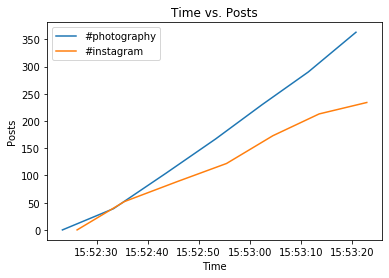

In [6]:
from pandas.plotting import register_matplotlib_converters
plt.plot(photo_df['time'], photo_df['posts'], label='#photography')
plt.plot(insta_df['time'], insta_df['posts'], label='#instagram')
plt.xlabel('Time')
plt.ylabel('Posts')
plt.title('Time vs. Posts')
plt.legend(loc="upper left")
plt.show()

And that's it! This is just a super small sampling of data and a single usecase of instascrape.Hashtag. If we wanted, we could focus on one hashtag and run a program for 24 hours straight to find the best time of day to post to that hashtag. We could compare 100 different hashtags and see which one's are growing the fastest. There are a ton of possibilities and instascrape.Hashtag is just a simple tool for abstracting out the actual scraping of the data so that you can focus on your algorithms and not on sifting through the HTML and JSON data!